<h1><b>MINI PROJETO 2 | </b>Lucas Fontenla</h1>
____
<h2>Estudo da distribuição da média amostral via simulação</h2>
____

<p>O objetivo deste miniprojeto é que o aluno seja capaz de compreender e explicar o
resultado do Teorema do Limite Central (TLC) por meio de simulação, uma vez que a
demonstração teórica é complexa e requer conhecimento de outras teorias avançadas.
A seguir, apresentamos a definição da média amostral e o resultado descrito no Teorema do
Limite Central.</p>

In [45]:
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import expon
import numpy

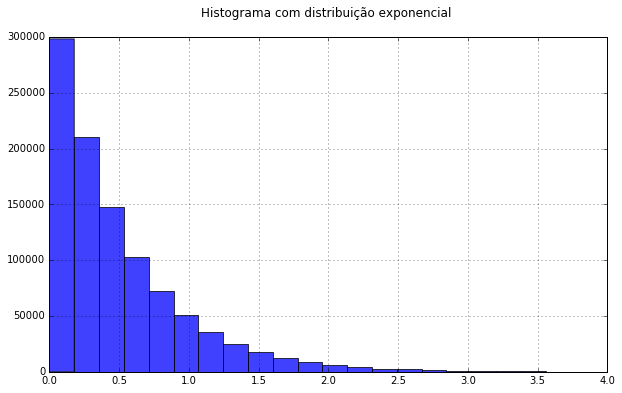

Média: 0.501
Variância: 0.25


In [43]:
mu = 0
Lambda = 0.5

exp = expon.rvs(loc=mu, scale=Lambda, size=1000000, random_state=None)

plt.figure(figsize=(10,6))
plt.hist(exp, bins=40, alpha=0.75)
plt.axis([0,4,0,300000])
plt.grid()
plt.title('Histograma com distribuição exponencial \n')
plt.show()

media = sum(exp)/len(exp)
variancia = (sum(exp*exp)/len(exp)) - media**2
    
print('Média:', round(media,3))
print('Variância:', round(variancia, 3))

In [50]:
chosen = numpy.random.choice(exp, 2)
print('Sorteio de 2 números: ', chosen)
print('Média: ', chosen.mean())

Sorteio de 2 números:  [ 0.89423738  0.18730642]
Média:  0.540771898157


Repetindo 10 mil vezes


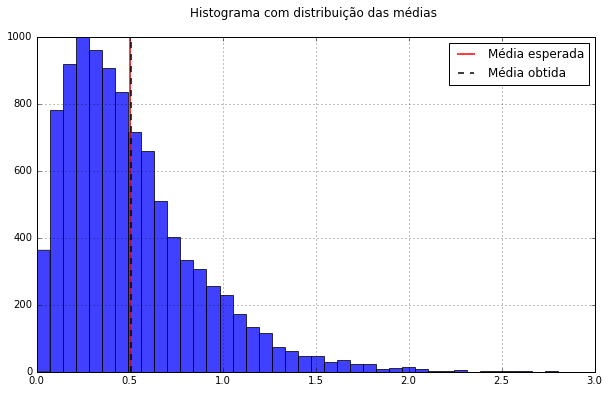

In [68]:
print('Repetindo 10 mil vezes')

medias = list()

for i in range(0, 10000):
    medias.append(numpy.random.choice(exp,2).mean())

plt.figure(figsize=(10,6))
plt.hist(medias, bins=40, alpha=0.75)
plt.axvline(media, color='red', lw=2, alpha=0.75, label='Média esperada')
plt.axvline(sum(medias)/len(medias), color='black', lw=2, alpha=0.75, ls='dashed', label='Média obtida')
plt.grid()
plt.legend(loc='best')
plt.title('Histograma com distribuição das médias \n')
plt.show()

<h4><b>Interpretação dos resultados</b></h4>
<p>Nota-se que a distribuiçao das médias 

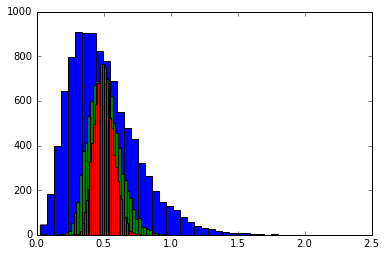

In [70]:
for n in [4,20,50]:
    medias = list()
    for i in range(0, 10000):
        medias.append(numpy.random.choice(exp,n).mean())
    plt.hist(medias, bins=40)
plt.show()